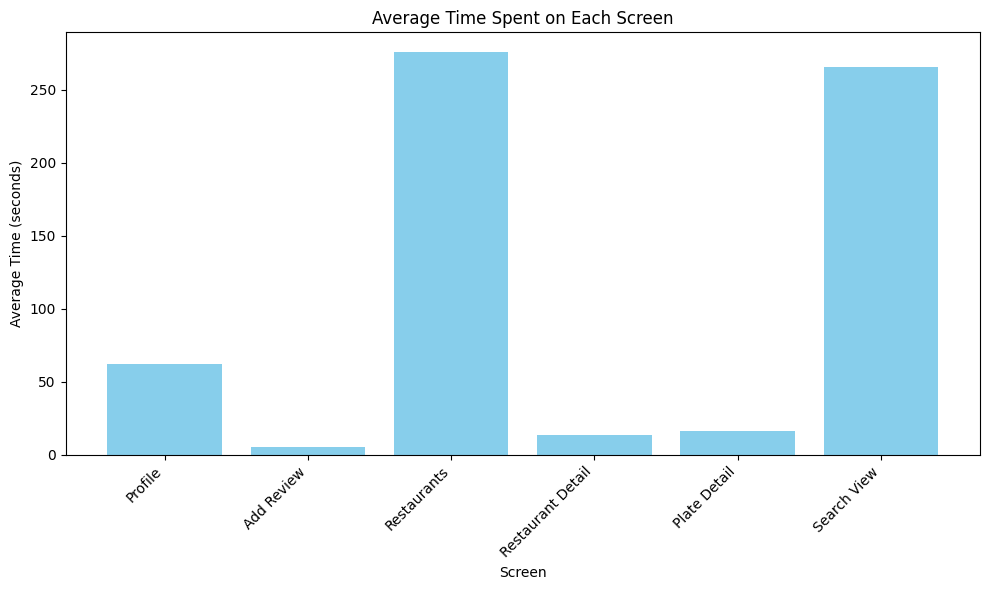

In [1]:
# Importar las bibliotecas necesarias
import firebase_admin
import re
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt
import pandas as pd

# Cargar las credenciales del servicio de Firebase
cred = credentials.Certificate("data/key.json")
firebase_admin.initialize_app(cred)

# Inicializar Firestore
db = firestore.client()

# Obtener todos los documentos de la colección "timer"
timer_ref = db.collection("timer").get()

# Inicializar un diccionario para almacenar el tiempo total y el conteo por pantalla
screen_times = {}

# Procesar los documentos
for timer in timer_ref:
    data = timer.to_dict()
    screen = data.get('screen')
    time = data.get('time')

    if screen and time > 0:
        if screen in screen_times:
            screen_times[screen]['total_time'] += time
            screen_times[screen]['count'] += 1
        else:
            screen_times[screen] = {'total_time': time, 'count': 1}

# Calcular el promedio de tiempo por pantalla
average_times = {screen: times['total_time'] / times['count'] for screen, times in screen_times.items()}

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(list(average_times.items()), columns=['Screen', 'Average Time (s)'])

# Graficar el promedio de tiempo por pantalla
plt.figure(figsize=(10, 6))
plt.bar(df['Screen'], df['Average Time (s)'], color='skyblue')
plt.xlabel('Screen')
plt.ylabel('Average Time (seconds)')
plt.title('Average Time Spent on Each Screen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
